In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from tqdm import tqdm
import seaborn as sns
sns.set_style("whitegrid")
from scipy.stats import norm

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu
from sklearn.metrics import average_precision_score # PR-AUC
from sklearn.ensemble import BaggingClassifier
from scipy.stats import ks_2samp
import random
import sklearn

!pip -q install lime
!pip -q install shap
import lime
import lime.lime_tabular
import shap

from sklearn.inspection import permutation_importance

     |████████████████████████████████| 275 kB 5.2 MB/s 
     |████████████████████████████████| 569 kB 6.1 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/data/features_asd_control_for_neural_network_course_desikan.csv'
df = pd.read_csv(path)

In [4]:
df.shape

(3020, 674)

In [5]:
df.columns

Index(['Unnamed: 0', 'coef_35_45_bankssts-rh',
       'coef_35_45_caudalanteriorcingulate-rh',
       'coef_35_45_caudalmiddlefrontal-rh', 'coef_35_45_cuneus-rh',
       'coef_35_45_entorhinal-rh', 'coef_35_45_frontalpole-rh',
       'coef_35_45_fusiform-rh', 'coef_35_45_inferiorparietal-rh',
       'coef_35_45_inferiortemporal-rh',
       ...
       'delta_2_40_rostralmiddlefrontal-lh', 'delta_2_40_superiorfrontal-lh',
       'delta_2_40_superiorparietal-lh', 'delta_2_40_superiortemporal-lh',
       'delta_2_40_supramarginal-lh', 'delta_2_40_temporalpole-lh',
       'delta_2_40_transversetemporal-lh', 'Subject', 'Age', 'IQ'],
      dtype='object', length=674)

In [6]:
df.Subject[1637]

'R0001'

Add Group column:

In [7]:
targets = []
for i in range(len(df['Subject'])):
  if df['Subject'].iloc[i][0]=='K':
    targets.append(0)
  elif df['Subject'].iloc[i][0]=='R':
    targets.append(1)

In [8]:
df['Group'] = targets

Exclude some children to make Age not significant between groups

Before:

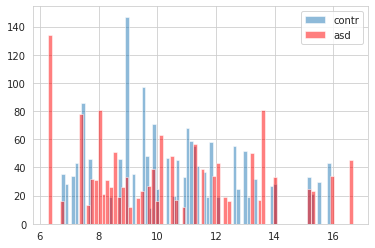

In [9]:
plt.hist(df[:1637]['Age'], alpha=0.5, label='contr', bins=80)
plt.hist(df[1637:]['Age'], color='red', alpha=0.5, label='asd', bins=80)
plt.legend()

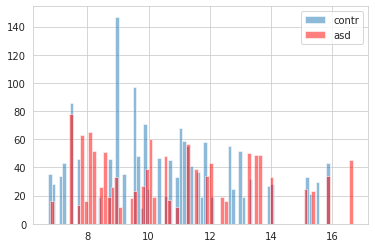

In [10]:
df = df[df['Age']>6.5]
plt.hist(df[:1637]['Age'], alpha=0.5, label='contr', bins=80)
plt.hist(df[1637:]['Age'], color='red', alpha=0.5, label='asd', bins=80)
plt.legend()

In [11]:
df[(df['Age']>8.5)&(df['Age']<10)]['Subject'].unique()

array(['K0015', 'K0017', 'K0018', 'K0025', 'K0030', 'K0033', 'K0045',
       'K0059', 'K0061', 'K0062', 'K0066', 'K0067', 'K0070', 'K0075',
       'R0005', 'R0007', 'R0010', 'R0034', 'R0038', 'R0040', 'R0050',
       'R0060', 'R0064', 'R0073'], dtype=object)

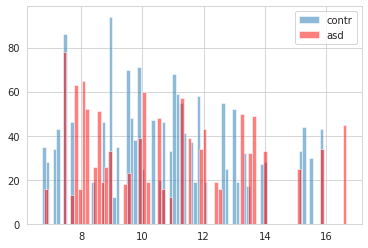

In [12]:
ttt = df.drop(df[df['Subject']=='K0075'].index)
ttt = ttt.drop(ttt[ttt['Subject']=='K0033'].index)
plt.hist(ttt[:1637]['Age'], alpha=0.5, label='contr', bins=80)
plt.hist(ttt[1637:]['Age'], color='red', alpha=0.5, label='asd', bins=80)
plt.legend()

In [13]:
ttt['Subject'].iloc[1557]

'R0001'

In [14]:
mannwhitneyu(ttt[:1557]['Age'], ttt[1557:]['Age'])

MannwhitneyuResult(statistic=979139.0, pvalue=0.7501230718650316)

In [15]:
ks_2samp(ttt[:1557]['Age'], ttt[1557:]['Age'])

KstestResult(statistic=0.150251479282334, pvalue=3.708144902248023e-14)

In [16]:
df = ttt

Change Age and IQ values so that they comprise specific bins

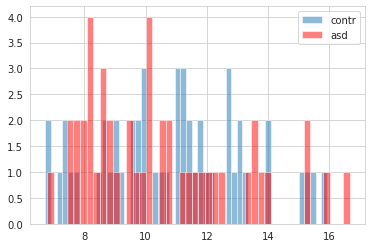

In [17]:
plt.hist(np.unique(df[df['Group']==0].Age), bins=50, label='contr', alpha=0.5)
plt.hist(np.unique(df[df['Group']==1].Age), bins=46, label='asd', color='red', alpha=0.5)
plt.legend()

In [18]:
Age_bin = [round(a) for a in df['Age']]
#for i in range(len(Age_bin)):
#  if Age_bin[i] > 16:
#    Age_bin[i] = 16

(array([273.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 347.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 334.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 463.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 432.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 268.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 266.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 169.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 102.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 107.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  45.]),
 array([ 7.        ,  7.0990099 ,  7.1980198 ,  7.2970297 ,  7.3960396 ,
         7.4950495 ,  7.59405941,  7.69306931,  7.79207921,  7.89108911,
         7.99009901,  8.08910891,  8.18811881,  8.28712871,  8.38613861,
         8.48514851,  8.58415842,  8.68316832,  8.78217822,  8.88118812,
         8.98019802,

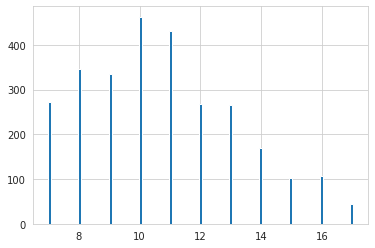

In [19]:
plt.hist(Age_bin, bins=101)

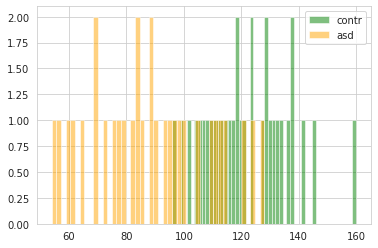

In [20]:
plt.hist(np.unique(df[df['Group']==0].IQ), bins=50, label='contr', alpha=0.5, color='green')
plt.hist(np.unique(df[df['Group']==1].IQ), bins=46, label='asd', color='orange', alpha=0.5)
plt.legend()

In [21]:
IQ_bin = [round(a/10)*10 for a in df['IQ'].values]
#for i in range(len(IQ_bin)):
#  if IQ_bin[i] > 140:
#    IQ_bin[i] = 140
#  if IQ_bin[i] < 60:
#    IQ_bin[i] = 60

(array([ 16.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 183.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 137.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 146.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 336.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 327.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        464.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 581.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 430.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 147.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  39.]),
 array([ 50.        ,  51.08910891,  52.17821782,  53.26732673,
         54.35643564,  55.44554455,  56.53465347,  57.62376238,
         58.71287129,  59.8019802 ,  60.89108911,  61.98019802,
         63.06930693,  64.15841584,  65.24752475,  66.33663366,
         67.42574257,  68.51485149,  69.6039604 ,  70.69

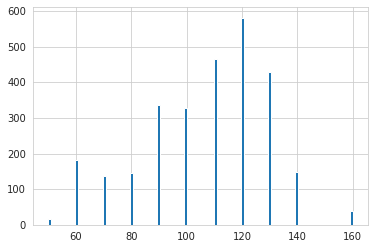

In [22]:
plt.hist(IQ_bin, bins=101)

Select only 35-45 Hz slope columns

In [23]:
cols = df.columns
sel_slope = []
for i in range(len(cols)):
  if 'coef_35_45' in cols[i]:
    sel_slope.append(i)

In [24]:
col_unique = set()
for i in cols:
  col_unique.add(i[:10])

In [25]:
col_unique

{'Age',
 'Group',
 'IQ',
 'Subject',
 'Unnamed: 0',
 'alpha_high',
 'alpha_low_',
 'beta_2_40_',
 'coef_2_40_',
 'coef_35_45',
 'delta_2_40',
 'offset_2_4',
 'r2_2_40_ba',
 'r2_2_40_ca',
 'r2_2_40_cu',
 'r2_2_40_en',
 'r2_2_40_fr',
 'r2_2_40_fu',
 'r2_2_40_in',
 'r2_2_40_is',
 'r2_2_40_la',
 'r2_2_40_li',
 'r2_2_40_me',
 'r2_2_40_mi',
 'r2_2_40_pa',
 'r2_2_40_pe',
 'r2_2_40_po',
 'r2_2_40_pr',
 'r2_2_40_ro',
 'r2_2_40_su',
 'r2_2_40_te',
 'r2_2_40_tr',
 'theta_2_40',
 'var_35_45_'}

In [26]:
df_slope = df.iloc[:,sel_slope]
df_slope['Age'] = Age_bin
df_slope['IQ'] = IQ_bin
df_slope['Group'] = df['Group'].values
df_slope.shape


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(2806, 70)

In [27]:
df_slope

,coef_35_45_bankssts-rh,coef_35_45_caudalanteriorcingulate-rh,coef_35_45_caudalmiddlefrontal-rh,coef_35_45_cuneus-rh,coef_35_45_entorhinal-rh,coef_35_45_frontalpole-rh,coef_35_45_fusiform-rh,coef_35_45_inferiorparietal-rh,coef_35_45_inferiortemporal-rh,coef_35_45_insula-rh,...,coef_35_45_rostralmiddlefrontal-lh,coef_35_45_superiorfrontal-lh,coef_35_45_superiorparietal-lh,coef_35_45_superiortemporal-lh,coef_35_45_supramarginal-lh,coef_35_45_temporalpole-lh,coef_35_45_transversetemporal-lh,Age,IQ,Group
0,-3.407684,-0.066113,-3.063276,-3.960296,-0.953466,-1.694825,-2.707379,-3.378527,-2.576670,-2.002253,...,-0.725836,-1.152271,-1.905544,-1.267192,0.130763,-2.366418,-2.000172,11,130,0
1,-3.136564,-1.233351,-4.434811,-2.719042,-3.297486,-1.650590,-2.871403,-2.930710,-2.466686,-3.472446,...,-1.220682,-1.530253,-2.394144,-2.080388,-0.761961,-2.128942,-3.146514,11,130,0
2,-4.141714,-1.971613,-3.738087,-2.103766,-3.205087,1.015009,-3.491095,-4.066944,-3.433390,-3.516501,...,-1.149156,-1.643051,-1.939434,-2.811371,-2.382888,-1.857628,-4.457521,11,130,0
3,-3.551342,-4.221336,-3.774384,-1.300262,-4.044242,-1.265895,-2.018444,-3.693597,-3.341768,-2.783836,...,-1.735935,-2.593365,-1.259099,-2.467130,-1.744996,-1.789943,-3.048600,11,130,0
4,-4.188802,-3.292070,-2.674675,-0.962331,-4.063687,-2.927272,-2.099544,-2.953050,-3.620931,-2.673150,...,-0.393899,-1.922435,-1.067380,-1.941661,-1.396466,-1.754121,-1.847746,11,130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,-1.930573,-1.713836,-2.206724,-0.647718,-3.492825,-0.942452,-2.824773,-0.982301,-2.592448,-2.920927,...,-1.912112,-0.721558,-1.397421,-2.247560,-1.846060,-1.046065,-3.247209,14,100,1
2960,-1.308109,-2.457510,-2.292513,0.463236,-1.637239,-0.337971,-1.821380,-1.008387,-1.598850,-2.131365,...,-1.123702,-0.087426,-1.152849,-2.867880,-1.345303,-1.934948,-2.100857,14,100,1
2961,0.222489,-3.332650,-1.495503,-0.559201,-1.094332,1.605285,-1.141132,0.680152,-0.659270,-0.820518,...,-0.477822,-0.815446,-0.280974,-1.233708,-0.787709,-0.991026,-0.608996,14,100,1
2962,-1.125187,-1.789187,-1.293675,-2.312003,-1.355275,-0.701393,-1.046334,-0.391571,-0.961069,-2.394473,...,-0.290238,-1.193116,-0.336957,-0.135479,-0.815745,0.764297,-1.629767,14,100,1


Try first model

In [28]:
df_my = df_slope

In [29]:
random.seed(0)
randomlist = random.sample(range(0, 95), 19, )
randomlist

[49, 53, 5, 33, 65, 62, 51, 38, 61, 45, 74, 27, 64, 17, 36, 12, 79, 32, 68]

In [30]:
not_inrandom = []
for i in range(95):
  if i not in randomlist:
    not_inrandom.append(i)

In [31]:
test_subjs = df.Subject.unique()[randomlist]
test_subjs

array(['K0074', 'R0007', 'K0010', 'K0053', 'R0031', 'R0024', 'R0003',
       'K0061', 'R0023', 'K0069', 'R0045', 'K0045', 'R0030', 'K0024',
       'K0058', 'K0017', 'R0055', 'K0052', 'R0034'], dtype=object)

In [32]:
train_subjs = df.Subject.unique()[not_inrandom]
train_subjs

array(['K0002', 'K0004', 'K0005', 'K0006', 'K0008', 'K0011', 'K0012',
       'K0013', 'K0014', 'K0015', 'K0016', 'K0018', 'K0019', 'K0020',
       'K0021', 'K0025', 'K0030', 'K0032', 'K0035', 'K0036', 'K0040',
       'K0041', 'K0042', 'K0043', 'K0046', 'K0049', 'K0050', 'K0051',
       'K0054', 'K0056', 'K0059', 'K0062', 'K0063', 'K0064', 'K0066',
       'K0067', 'K0068', 'K0070', 'K0071', 'K0072', 'R0001', 'R0005',
       'R0009', 'R0010', 'R0012', 'R0015', 'R0016', 'R0017', 'R0021',
       'R0028', 'R0032', 'R0033', 'R0036', 'R0038', 'R0039', 'R0040',
       'R0042', 'R0047', 'R0050', 'R0051', 'R0052', 'R0057', 'R0058',
       'R0060', 'R0061', 'R0064', 'R0065', 'R0066', 'R0067', 'R0068',
       'R0069', 'R0070', 'R0071', 'R0073', 'R0074', 'R0075'], dtype=object)

In [33]:
i_train = []
i_test = []
for i in range(len(df)):
  if df.Subject.iloc[i] in test_subjs:
    i_test.append(i)
  else:
    i_train.append(i)

In [34]:
X_train = df_my.drop(columns=['IQ', 'Group']).iloc[i_train,:].values
Y_train = df_my['IQ'].values[i_train]
X_test = df_my.drop(columns=['IQ', 'Group']).iloc[i_test,:].values
Y_test = df_my['IQ'].values[i_test]

In [35]:
df_my[df_my['Group']==0].shape

(1557, 70)

In [36]:
df_my[df_my['Group']==1].shape

(1249, 70)

In [ ]:
clf1 = DecisionTreeRegressor(max_depth = 3)
clf1.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3)

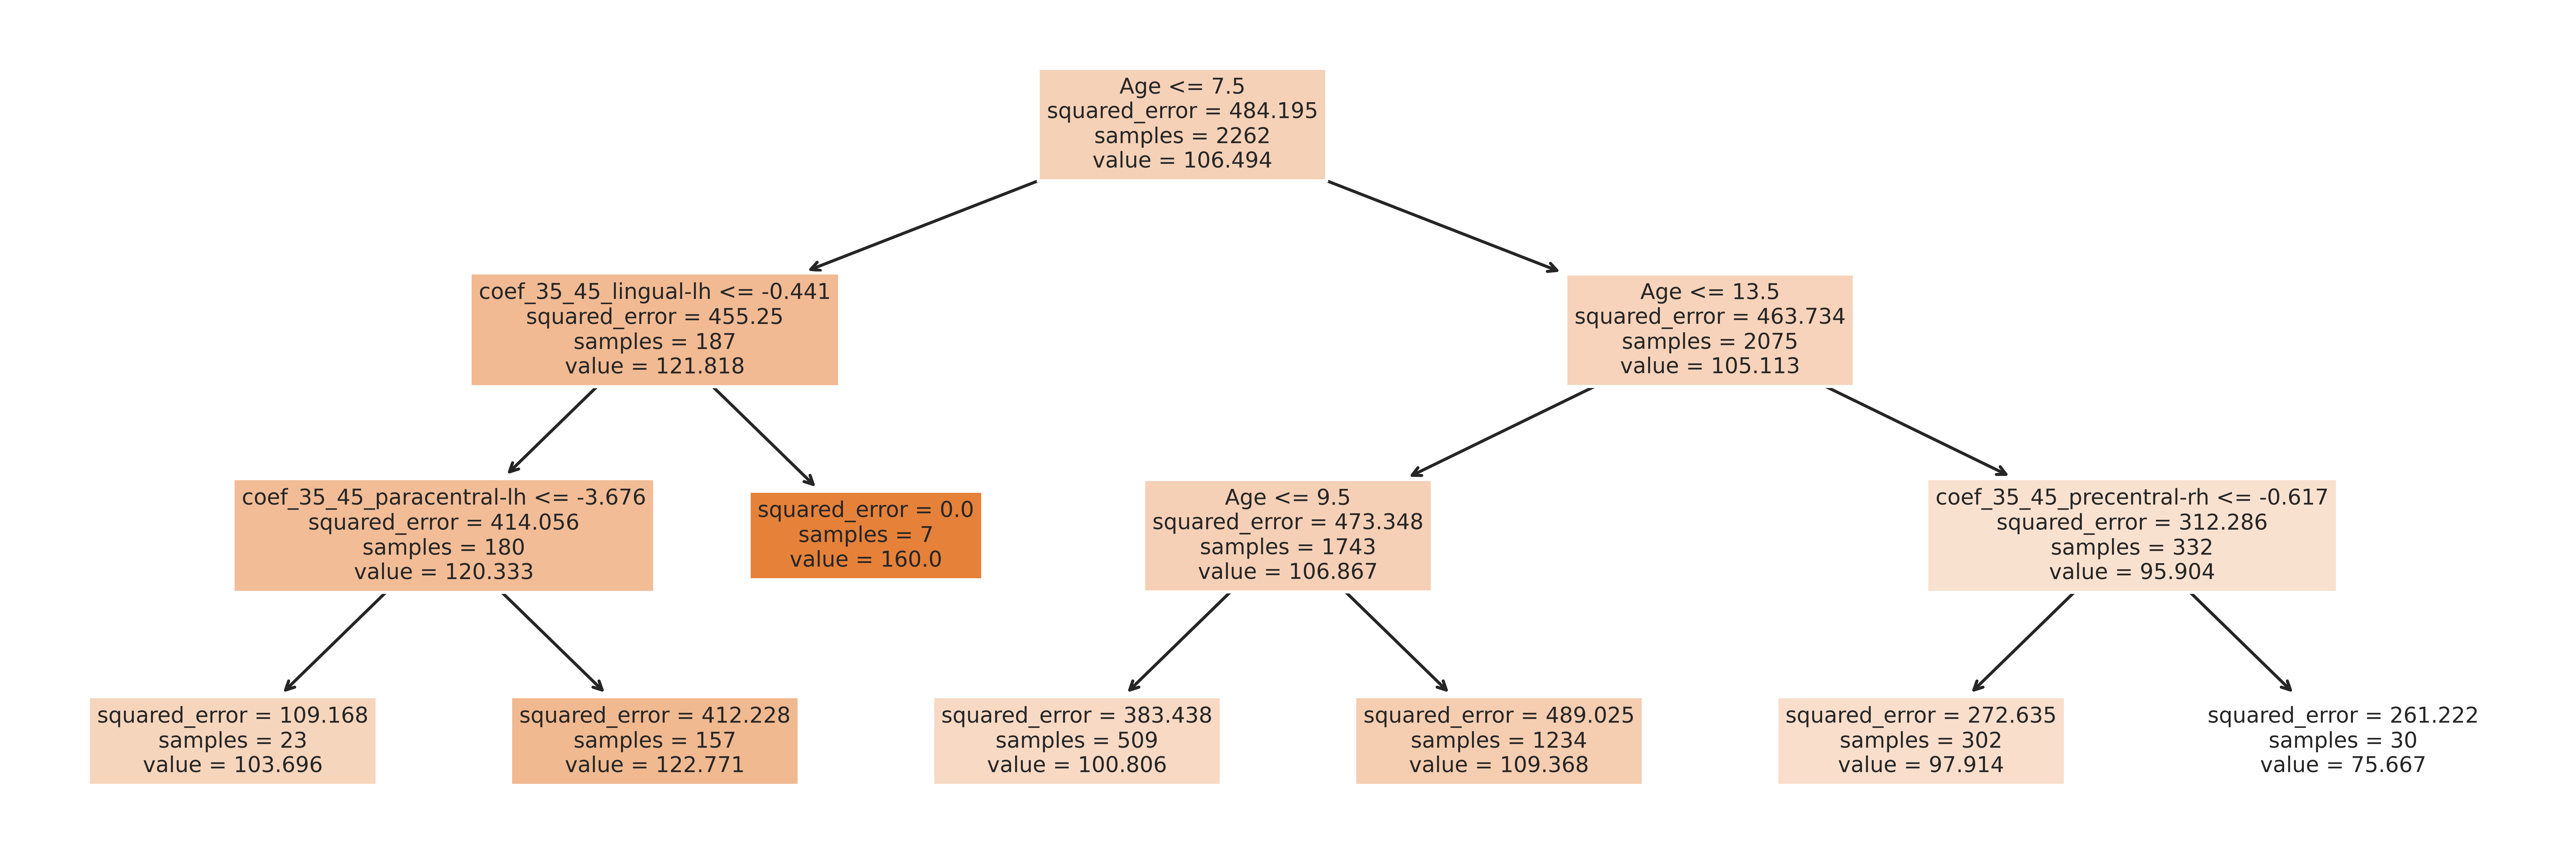

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,5), dpi=1000)
tree.plot_tree(clf1,
               feature_names = df_my.columns, 
               #class_names = ['C', 'Ahigh', 'Alow'],
               filled = True)
plt.show()

In [ ]:
# Compute accuracy based on test samples
print("The model training score is" , clf1.score(X_train, Y_train))

The model training score is 0.12711229536005264


In [ ]:
rf_clf = RandomForestRegressor(n_estimators=1000,
                               #max_depth=15,
                               #min_samples_leaf=0.5,
                               random_state=42, 
                               n_jobs=-1) # run in parallel

In [ ]:
rf_clf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
# Compute accuracy based on test samples
print("The model training score is" , rf_clf.score(X_test, Y_test))

The model training score is -0.1275975247903407


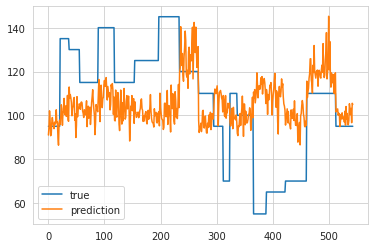

In [ ]:
plt.plot(Y_test, label='true')
plt.plot(rf_clf.predict(X_test), label='prediction')
plt.legend()

##Отдельно по группам?

In [37]:
train = df_my.iloc[i_train,:]
test = df_my.iloc[i_test,:]
X_train_c = train[train.Group==0].drop(columns=['IQ']).values
Y_train_c = train[train.Group==0]['IQ'].values
X_test_c = test[test.Group==0].drop(columns=['IQ']).values
Y_test_c = test[test.Group==0]['IQ'].values

X_train_a = train[train.Group==1].drop(columns=['IQ']).values
Y_train_a = train[train.Group==1]['IQ'].values
X_test_a = test[test.Group==1].drop(columns=['IQ']).values
Y_test_a = test[test.Group==1]['IQ'].values

In [38]:
ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

In [39]:
rf_clf = RandomForestRegressor(n_estimators=1000,
                               max_depth=15,
                               #min_samples_leaf=0.5,
                               random_state=42, 
                               n_jobs=-1) # run in parallel

In [40]:
rf_clf.fit(X_train_a, Y_train_a)

RandomForestRegressor(max_depth=15, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [41]:
# Compute accuracy based on test samples
print("The model training score is" , rf_clf.score(X_test_a, Y_test_a))

The model training score is 0.17923566962557336


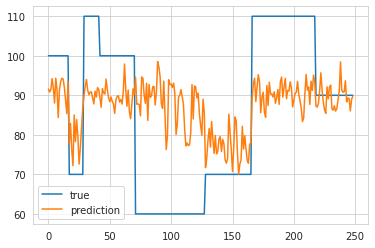

In [42]:
plt.plot(Y_test_a, label='true')
plt.plot(rf_clf.predict(X_test_a), label='prediction')
plt.legend()

In [ ]:
rf_clf.feature_importances_

array([0.01635338, 0.00961144, 0.01325334, 0.01114077, 0.01089363,
       0.01399043, 0.00899273, 0.03004222, 0.01182061, 0.00841503,
       0.00987184, 0.0129819 , 0.01332209, 0.00891745, 0.0126073 ,
       0.01426315, 0.01109259, 0.0080722 , 0.0099256 , 0.01268599,
       0.01274793, 0.00787022, 0.0174323 , 0.01001835, 0.01326108,
       0.01037209, 0.0193961 , 0.00998498, 0.02190302, 0.014818  ,
       0.01629201, 0.02606344, 0.01017869, 0.01222619, 0.01126464,
       0.01027614, 0.00883245, 0.0097997 , 0.01171356, 0.01004758,
       0.01873185, 0.01363782, 0.01202089, 0.00971802, 0.01256742,
       0.0083558 , 0.00998939, 0.00842592, 0.01465897, 0.01065632,
       0.00855121, 0.0147934 , 0.00805669, 0.01361731, 0.00998752,
       0.01412779, 0.01373137, 0.01153325, 0.01019232, 0.00802258,
       0.00949686, 0.01304885, 0.01281828, 0.01124856, 0.01994106,
       0.00968001, 0.01106669, 0.16857167, 0.        ])

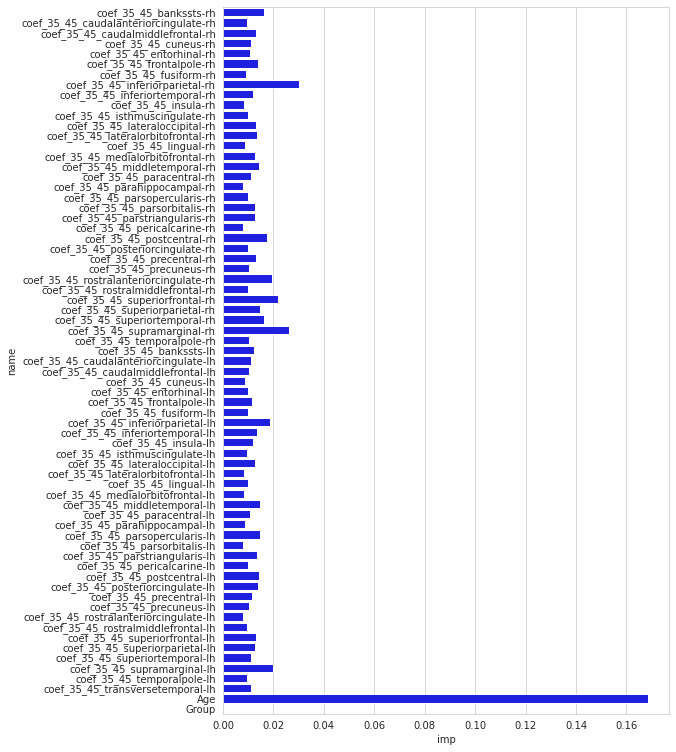

In [ ]:
df = pd.DataFrame({"name": train[train.Group==0].drop(columns=['IQ']).columns, "imp": rf_clf.feature_importances_})

plt.figure(figsize=(8, 13))
sns.barplot(data=df, y="name", x="imp", color="blue", orient = 'h')
plt.show()

In [ ]:
train[train.Group==0].drop(columns=['IQ']).columns

Index(['coef_35_45_bankssts-rh', 'coef_35_45_caudalanteriorcingulate-rh',
       'coef_35_45_caudalmiddlefrontal-rh', 'coef_35_45_cuneus-rh',
       'coef_35_45_entorhinal-rh', 'coef_35_45_frontalpole-rh',
       'coef_35_45_fusiform-rh', 'coef_35_45_inferiorparietal-rh',
       'coef_35_45_inferiortemporal-rh', 'coef_35_45_insula-rh',
       'coef_35_45_isthmuscingulate-rh', 'coef_35_45_lateraloccipital-rh',
       'coef_35_45_lateralorbitofrontal-rh', 'coef_35_45_lingual-rh',
       'coef_35_45_medialorbitofrontal-rh', 'coef_35_45_middletemporal-rh',
       'coef_35_45_paracentral-rh', 'coef_35_45_parahippocampal-rh',
       'coef_35_45_parsopercularis-rh', 'coef_35_45_parsorbitalis-rh',
       'coef_35_45_parstriangularis-rh', 'coef_35_45_pericalcarine-rh',
       'coef_35_45_postcentral-rh', 'coef_35_45_posteriorcingulate-rh',
       'coef_35_45_precentral-rh', 'coef_35_45_precuneus-rh',
       'coef_35_45_rostralanteriorcingulate-rh',
       'coef_35_45_rostralmiddlefrontal-rh', '

In [ ]:
r = permutation_importance(rf_clf, X_test_a, Y_test_a, n_repeats=100)
r.importances_mean

KeyboardInterrupt: ignored

In [ ]:
df = pd.DataFrame({"name": train[train.Group==0].drop(columns=['IQ']).columns, "imp": r.importances_mean})

plt.figure(figsize=(8, 13))
sns.barplot(data=df, y="name", x="imp", color="blue", orient = 'h')
plt.show()

In [ ]:
np.argwhere(np.abs(r.importances_mean)>0.0001).reshape(-1).shape

In [ ]:
np.arange(0.0001, 0.015, 0.0001)

In [ ]:
scores = []
thrs = np.arange(0.0001, 0.015, 0.0001)
for i in range(len(thrs)):
    thr = thrs[i]
    goods = np.argwhere(np.abs(r.importances_mean)>thr).reshape(-1)

    X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods].values
    Y_train_a = train[train.Group==1]['IQ'].values
    X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods].values
    Y_test_a = test[test.Group==1]['IQ'].values

    from sklearn.preprocessing import StandardScaler

    ss = StandardScaler()
    X_train_a = ss.fit_transform(X_train_a)
    X_test_a = ss.fit_transform(X_test_a)
    X_train_c = ss.fit_transform(X_train_c)
    X_test_c = ss.fit_transform(X_test_c)

    rf_clf = RandomForestRegressor(n_estimators=1000,
                                max_depth=15,
                                #min_samples_leaf=0.5,
                                random_state=42, 
                                n_jobs=-1) # run in parallel

    rf_clf.fit(X_train_a, Y_train_a)
    scores.append(rf_clf.score(X_test_a, Y_test_a))

In [ ]:
plt.plot(thrs, scores)
plt.xlabel('Threshold')
plt.ylabel('Score')

##0.012 threshold - best

In [44]:
train[train.Group==1].drop(columns=['IQ']).iloc[:,goods].iloc[:,np.argwhere(np.abs(r.importances_mean)>0.012).reshape(-1)].columns

NameError: ignored

In [ ]:
goods = np.append(np.argwhere(np.abs(r.importances_mean)>0.012).reshape(-1), [0,48,8])

NameError: ignored

In [ ]:
goods

In [43]:
goods = np.array([7, 67, 48,  8])

In [ ]:
train[train.Group==1].drop(columns=['IQ']).iloc[:,goods].columns

In [ ]:
67,31,7,22,40,64,0,30, 48, 5, 24, 51, 41, 29, 11, 53, 56, 28, 8

In [ ]:
X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods].values
Y_train_a = train[train.Group==1]['IQ'].values
X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods].values
Y_test_a = test[test.Group==1]['IQ'].values

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

rf_clf = RandomForestRegressor(n_estimators=1000,
                               max_depth=15,
                               #min_samples_leaf=0.5,
                               random_state=42, 
                               n_jobs=-1) # run in parallel

rf_clf.fit(X_train_a, Y_train_a)

# Compute accuracy based on test samples
print("The model training score is" , rf_clf.score(X_test_a, Y_test_a))

In [ ]:
plt.plot(Y_test_a, label='true')
plt.plot(rf_clf.predict(X_test_a), label='prediction')
plt.legend()

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_a, 
                                                   feature_names=train[train.Group==1].drop(columns=['IQ']).iloc[:,goods].columns.tolist(),
                                                   class_names=['IQ'], verbose=True, mode='regression')

j = 5
exp = explainer.explain_instance(X_test_a[j], rf_clf.predict, num_features=6)

In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
exp.as_list()

##Видимо он не поможет найти общие важные для детей фичи. Используем shap

In [45]:
X_train_a = train[train.Group==1].drop(columns=['IQ'])
Y_train_a = train[train.Group==1]['IQ']
X_test_a = test[test.Group==1].drop(columns=['IQ'])
Y_test_a = test[test.Group==1]['IQ']
X_train_с = train[train.Group==0].drop(columns=['IQ'])
Y_train_с = train[train.Group==0]['IQ']
X_test_с = test[test.Group==0].drop(columns=['IQ'])
Y_test_с = test[test.Group==0]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

##Для аутистов

In [46]:
rf_clf = RandomForestRegressor(n_estimators=1000,
                               max_depth=15,
                               #min_samples_leaf=0.5,
                               random_state=42, 
                               n_jobs=-1) # run in parallel

rf_clf.fit(X_train_a, Y_train_a)

# Compute accuracy based on test samples
print("The model training score is" , rf_clf.score(X_test_a, Y_test_a))

The model training score is 0.17923566962557314


In [47]:
# Fits the explainer
explainer = shap.Explainer(rf_clf.predict, X_test_a)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_a)

Permutation explainer: 250it [12:13,  2.97s/it]


In [48]:
67, 7, 31, 40, 64, 0, 22, 29, 56, 4, 12, 48, 30, 28, 51, 5, 8, 15, 53

(67, 7, 31, 40, 64, 0, 22, 29, 56, 4, 12, 48, 30, 28, 51, 5, 8, 15, 53)

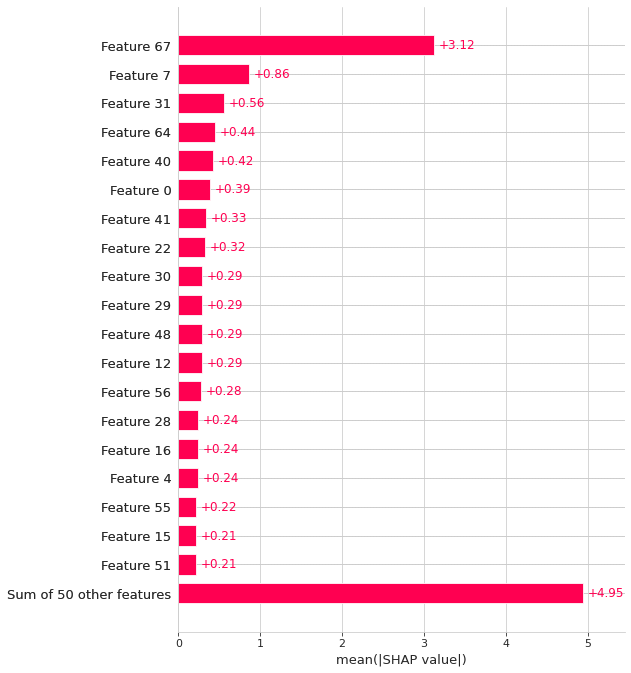

In [49]:
shap.plots.bar(shap_values, max_display=20)

##Для контролей

In [ ]:
rf_clf = RandomForestRegressor(n_estimators=1000,
                               max_depth=15,
                               #min_samples_leaf=0.5,
                               random_state=42, 
                               n_jobs=-1) # run in parallel

rf_clf.fit(X_train_c, Y_train_c)

# Compute accuracy based on test samples
print("The model training score is" , rf_clf.score(X_test_c, Y_test_c))

The model training score is -0.283118407515196


In [ ]:
# Fits the explainer
explainer = shap.Explainer(rf_clf.predict, X_test_c)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_c)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fit

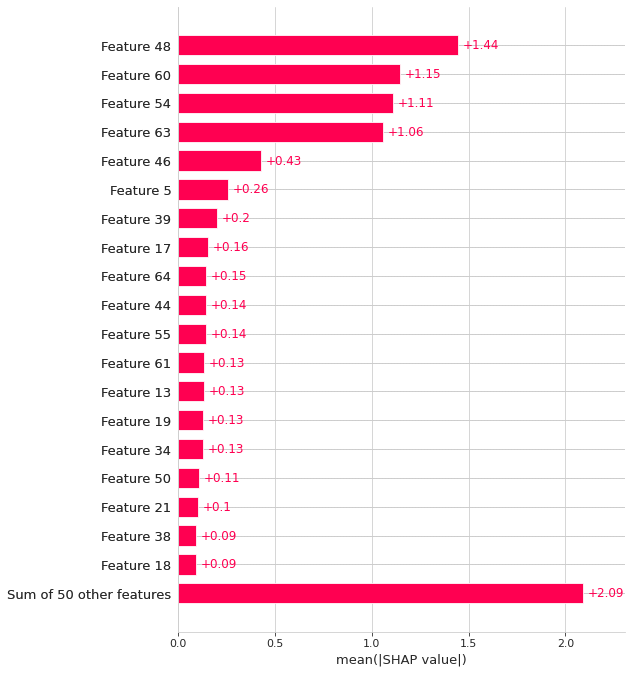

In [ ]:
shap.plots.bar(shap_values, max_display=20)

In [ ]:
48, 60, 54, 63, 46, 5, 39, 17, 64, 44, 55, 61, 13, 19, 34, 50, 21, 38, 18

##Выбор хороших фичей

##Аутисты

In [50]:
goods = np.array([67, 7, 31, 40, 64, 22, 29, 56, 4, 12, 48, 30, 28, 51, 5, 8, 15, 53])

In [51]:
goods = np.array([67, 7, 48, 8]) # best
#goods = np.array([67, 7, 31, 40, 64, 22, 29, 56, 4, 12, 48, 30, 28, 51, 5, 8, 15, 53])

X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_train_a = train[train.Group==1]['IQ']
X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_test_a = test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)

rf_clf = RandomForestRegressor(n_estimators=100,
                               max_depth=15,
                               #min_samples_leaf=0.5,
                               random_state=42, 
                               n_jobs=-1) # run in parallel

rf_clf.fit(X_train_a, Y_train_a)

# Compute accuracy based on test samples
print("The model training score is" , rf_clf.score(X_test_a, Y_test_a))

The model training score is 0.31795820310907197


In [52]:
train[train.Group==1].drop(columns=['IQ']).iloc[:,goods].columns

Index(['Age', 'coef_35_45_inferiorparietal-rh', 'coef_35_45_middletemporal-lh',
       'coef_35_45_inferiortemporal-rh'],
      dtype='object')

##Контроли

In [53]:
goods = np.array([34, 44, 64, 48, 60, 61, 13]) #best

In [54]:
X_train_c = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_train_c = train[train.Group==1]['IQ']
X_test_c = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_test_c = test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

rf_clf = RandomForestRegressor(n_estimators=100,
                               max_depth=15,
                               #min_samples_leaf=0.5,
                               random_state=42, 
                               n_jobs=-1) # run in parallel

rf_clf.fit(X_train_c, Y_train_c)

# Compute accuracy based on test samples
print("The model training score is" , rf_clf.score(X_test_c, Y_test_c))

The model training score is 0.08679364272828916


In [55]:
train[train.Group==0].drop(columns=['IQ']).iloc[:,goods].columns

Index(['coef_35_45_caudalanteriorcingulate-lh',
       'coef_35_45_lateraloccipital-lh', 'coef_35_45_supramarginal-lh',
       'coef_35_45_middletemporal-lh', 'coef_35_45_rostralmiddlefrontal-lh',
       'coef_35_45_superiorfrontal-lh', 'coef_35_45_lingual-rh'],
      dtype='object')

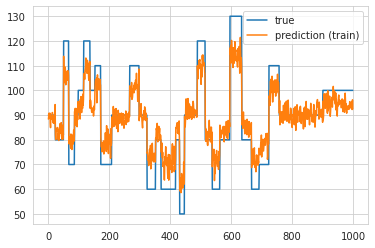

In [ ]:
plt.plot(np.arange(len(Y_train_c)), Y_train_c, label='true')
plt.plot(np.arange(len(Y_train_c)), rf_clf.predict(X_train_c), label='prediction (train)')
plt.legend()

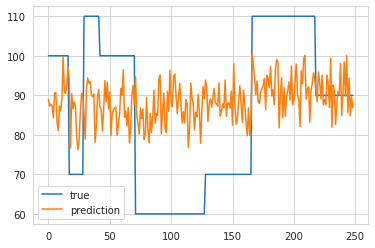

In [ ]:
plt.plot(np.arange(len(Y_test_c)), Y_test_c, label='true')
plt.plot(np.arange(len(Y_test_c)), rf_clf.predict(X_test_c), label='prediction')
plt.legend()

##Test other parameters

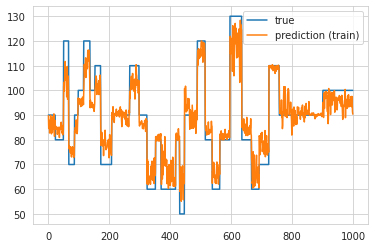

In [ ]:
plt.plot(np.arange(len(Y_train_a)), Y_train_a, label='true')
plt.plot(np.arange(len(Y_train_a)), rf_clf.predict(X_train_a), label='prediction (train)')
plt.legend()

In [ ]:
print("The model training score is" , rf_clf.score(X_train_a, Y_train_a))

The model training score is 0.8778649922525261


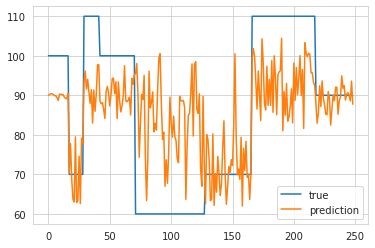

In [ ]:
plt.plot(np.arange(len(Y_test_a)), Y_test_a, label='true')
plt.plot(np.arange(len(Y_test_a)), rf_clf.predict(X_test_a), label='prediction')
plt.legend()

In [ ]:
scores = []

X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_train_a = train[train.Group==1]['IQ']
X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_test_a = test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

ests = np.arange(1,100,1)
for i in range(len(ests)):
  rf_clf = RandomForestRegressor(n_estimators=ests[i],
                                max_depth=100,
                                #min_samples_leaf=1,
                                random_state=42, 
                                n_jobs=-1) # run in parallel

  rf_clf.fit(X_train_a, Y_train_a)
  scores.append(rf_clf.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

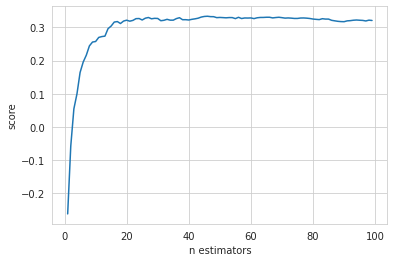

In [ ]:
plt.plot(ests, scores)
plt.xlabel('n estimators')
plt.ylabel('score')

In [ ]:
scores = []

X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_train_a = train[train.Group==1]['IQ']
X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_test_a = test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

depths = np.arange(1,100,1)
for i in range(len(depths)):
  rf_clf = RandomForestRegressor(n_estimators=100,
                                max_depth=depths[i],
                                #min_samples_leaf=1,
                                random_state=42, 
                                n_jobs=-1) # run in parallel

  rf_clf.fit(X_train_a, Y_train_a)
  scores.append(rf_clf.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

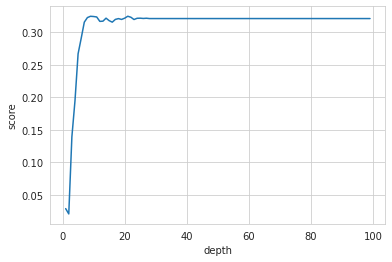

In [ ]:
plt.plot(depths, scores)
plt.xlabel('depth')
plt.ylabel('score')


In [ ]:
np.argmax(depths)

98

In [ ]:
scores = []

X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_train_a = train[train.Group==1]['IQ']
X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_test_a = test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

splits = np.arange(2,100,1)
for i in range(len(splits)):
  rf_clf = RandomForestRegressor(n_estimators=100,
                                max_depth=100,
                                min_samples_split=splits[i],
                                #min_samples_leaf=1,
                                random_state=42, 
                                n_jobs=-1) # run in parallel

  rf_clf.fit(X_train_a, Y_train_a)
  scores.append(rf_clf.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

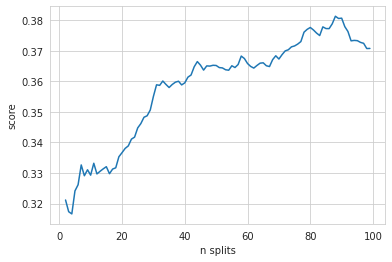

In [ ]:
plt.plot(splits, scores)
plt.xlabel('n splits')
plt.ylabel('score')


In [ ]:
scores = []

X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_train_a = train[train.Group==1]['IQ']
X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_test_a = test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

leafs = np.arange(1,100,1)
for i in range(len(leafs)):
  rf_clf = RandomForestRegressor(n_estimators=100,
                                max_depth=19,
                                min_samples_split=10,
                                min_samples_leaf=leafs[i],
                                random_state=42, 
                                n_jobs=-1) # run in parallel

  rf_clf.fit(X_train_a, Y_train_a)
  scores.append(rf_clf.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

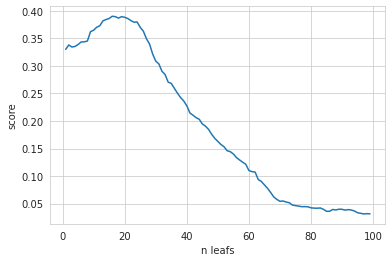

In [ ]:
plt.plot(leafs, scores)
plt.xlabel('n leafs')
plt.ylabel('score')

In [ ]:
np.argmax(scores)

15

In [ ]:
rf_clf = RandomForestRegressor(n_estimators=100,
                                max_depth=19,
                                min_samples_split=10,
                                min_samples_leaf=17,
                                random_state=42, 
                                max_features=4,
                                n_jobs=-1) # run in parallel

rf_clf.fit(X_train_a, Y_train_a)
rf_clf.score(X_test_a, Y_test_a)

0.3893929721766537

##Контроль

In [ ]:
scores = []

X_train_c = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_train_c = train[train.Group==1]['IQ']
X_test_c= test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_test_c= test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

ests = np.arange(1,100,1)
for i in range(len(ests)):
  rf_clf = RandomForestRegressor(n_estimators=ests[i],
                                max_depth=100,
                                #min_samples_leaf=1,
                                random_state=42, 
                                n_jobs=-1) # run in parallel

  rf_clf.fit(X_train_c, Y_train_c)
  scores.append(rf_clf.score(X_test_c, Y_test_c))

Text(0, 0.5, 'score')

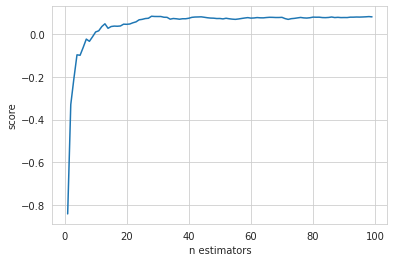

In [ ]:
plt.plot(ests, scores)
plt.xlabel('n estimators')
plt.ylabel('score')

In [ ]:
scores = []

X_train_c = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_train_c = train[train.Group==1]['IQ']
X_test_c = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_test_c = test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

depths = np.arange(1,100,1)
for i in range(len(depths)):
  rf_clf = RandomForestRegressor(n_estimators=100,
                                max_depth=depths[i],
                                #min_samples_leaf=1,
                                random_state=42, 
                                n_jobs=-1) # run in parallel

  rf_clf.fit(X_train_c, Y_train_c)
  scores.append(rf_clf.score(X_test_c, Y_test_c))

Text(0, 0.5, 'score')

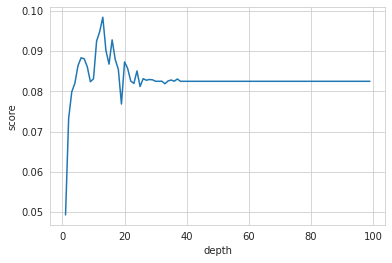

In [ ]:
plt.plot(depths, scores)
plt.xlabel('depth')
plt.ylabel('score')


In [ ]:
np.argmax(depths)

98

In [ ]:
scores = []

X_train_c = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_train_c = train[train.Group==1]['IQ']
X_test_c = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_test_c = test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

splits = np.arange(2,100,1)
for i in range(len(splits)):
  rf_clf = RandomForestRegressor(n_estimators=100,
                                max_depth=100,
                                min_samples_split=splits[i],
                                #min_samples_leaf=1,
                                random_state=42, 
                                n_jobs=-1) # run in parallel

  rf_clf.fit(X_train_c, Y_train_c)
  scores.append(rf_clf.score(X_test_c, Y_test_c))

Text(0, 0.5, 'score')

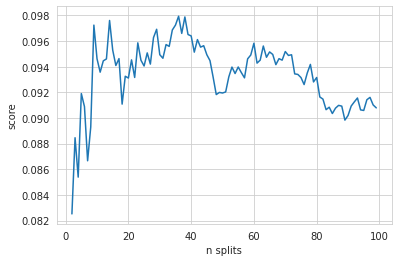

In [ ]:
plt.plot(splits, scores)
plt.xlabel('n splits')
plt.ylabel('score')


In [ ]:
scores = []

X_train_c = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_train_c = train[train.Group==1]['IQ']
X_test_c = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_test_c = test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

leafs = np.arange(1,100,1)
for i in range(len(leafs)):
  rf_clf = RandomForestRegressor(n_estimators=100,
                                max_depth=19,
                                min_samples_split=10,
                                min_samples_leaf=leafs[i],
                                random_state=42, 
                                n_jobs=-1) # run in parallel

  rf_clf.fit(X_train_c, Y_train_c)
  scores.append(rf_clf.score(X_test_c, Y_test_c))

Text(0, 0.5, 'score')

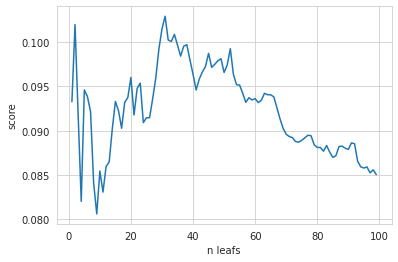

In [ ]:
plt.plot(leafs, scores)
plt.xlabel('n leafs')
plt.ylabel('score')

In [ ]:
np.argmax(scores)

30

In [ ]:
scores = []

X_train_c = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_train_c = train[train.Group==1]['IQ']
X_test_c = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_test_c = test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

feats = np.arange(1,8,1)
for i in range(len(feats)):
  rf_clf = RandomForestRegressor(n_estimators=100,
                                max_depth=19,
                                min_samples_split=10,
                                min_samples_leaf=17,
                                random_state=42,
                                max_features=feats[i], 
                                n_jobs=-1) # run in parallel

  rf_clf.fit(X_train_c, Y_train_c)
  scores.append(rf_clf.score(X_test_c, Y_test_c))

Text(0, 0.5, 'score')

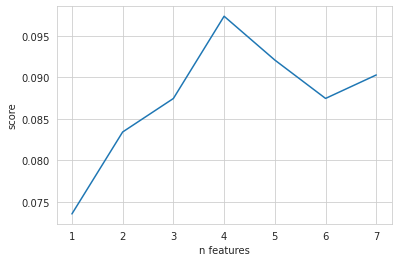

In [ ]:
plt.plot(feats, scores)
plt.xlabel('n features')
plt.ylabel('score')

In [ ]:
rf_clf = RandomForestRegressor(n_estimators=100,
                                max_depth=12,
                                min_samples_split=38,
                                min_samples_leaf=30,
                                random_state=42, 
                                max_features=4,
                                n_jobs=-1) # run in parallel

rf_clf.fit(X_train_c, Y_train_c)
rf_clf.score(X_test_c, Y_test_c)

0.09767716523581238

In [ ]:
train.columns

Index(['coef_35_45_bankssts-rh', 'coef_35_45_caudalanteriorcingulate-rh',
       'coef_35_45_caudalmiddlefrontal-rh', 'coef_35_45_cuneus-rh',
       'coef_35_45_entorhinal-rh', 'coef_35_45_frontalpole-rh',
       'coef_35_45_fusiform-rh', 'coef_35_45_inferiorparietal-rh',
       'coef_35_45_inferiortemporal-rh', 'coef_35_45_insula-rh',
       'coef_35_45_isthmuscingulate-rh', 'coef_35_45_lateraloccipital-rh',
       'coef_35_45_lateralorbitofrontal-rh', 'coef_35_45_lingual-rh',
       'coef_35_45_medialorbitofrontal-rh', 'coef_35_45_middletemporal-rh',
       'coef_35_45_paracentral-rh', 'coef_35_45_parahippocampal-rh',
       'coef_35_45_parsopercularis-rh', 'coef_35_45_parsorbitalis-rh',
       'coef_35_45_parstriangularis-rh', 'coef_35_45_pericalcarine-rh',
       'coef_35_45_postcentral-rh', 'coef_35_45_posteriorcingulate-rh',
       'coef_35_45_precentral-rh', 'coef_35_45_precuneus-rh',
       'coef_35_45_rostralanteriorcingulate-rh',
       'coef_35_45_rostralmiddlefrontal-rh', '

In [ ]:
df.shape

(2806, 675)

##Try other features also, not only slope

In [56]:
df_my = df.copy()
df_my['Age'] = Age_bin
df_my['IQ'] = IQ_bin
df_my['Group'] = df['Group'].values
df_my.shape

(2806, 675)

In [57]:
train_all = df_my.iloc[i_train,:]
test_all = df_my.iloc[i_test,:]

##Autism

In [58]:
X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject'])
Y_train_a = train_all[train_all.Group==1]['IQ']
X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject'])
Y_test_a = test_all[test_all.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)

rf_clf = RandomForestRegressor(n_estimators=100,
                               max_depth=15,
                               #min_samples_leaf=0.5,
                               random_state=42, 
                               n_jobs=-1) # run in parallel

rf_clf.fit(X_train_a, Y_train_a)

# Compute accuracy based on test samples
print("The model training score is" , rf_clf.score(X_test_a, Y_test_a))

The model training score is 0.0638011481925056


In [59]:
# Fits the explainer
explainer = shap.Explainer(rf_clf.predict, X_test_a)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_a, max_evals=1345)

Permutation explainer: 250it [14:01,  3.42s/it]


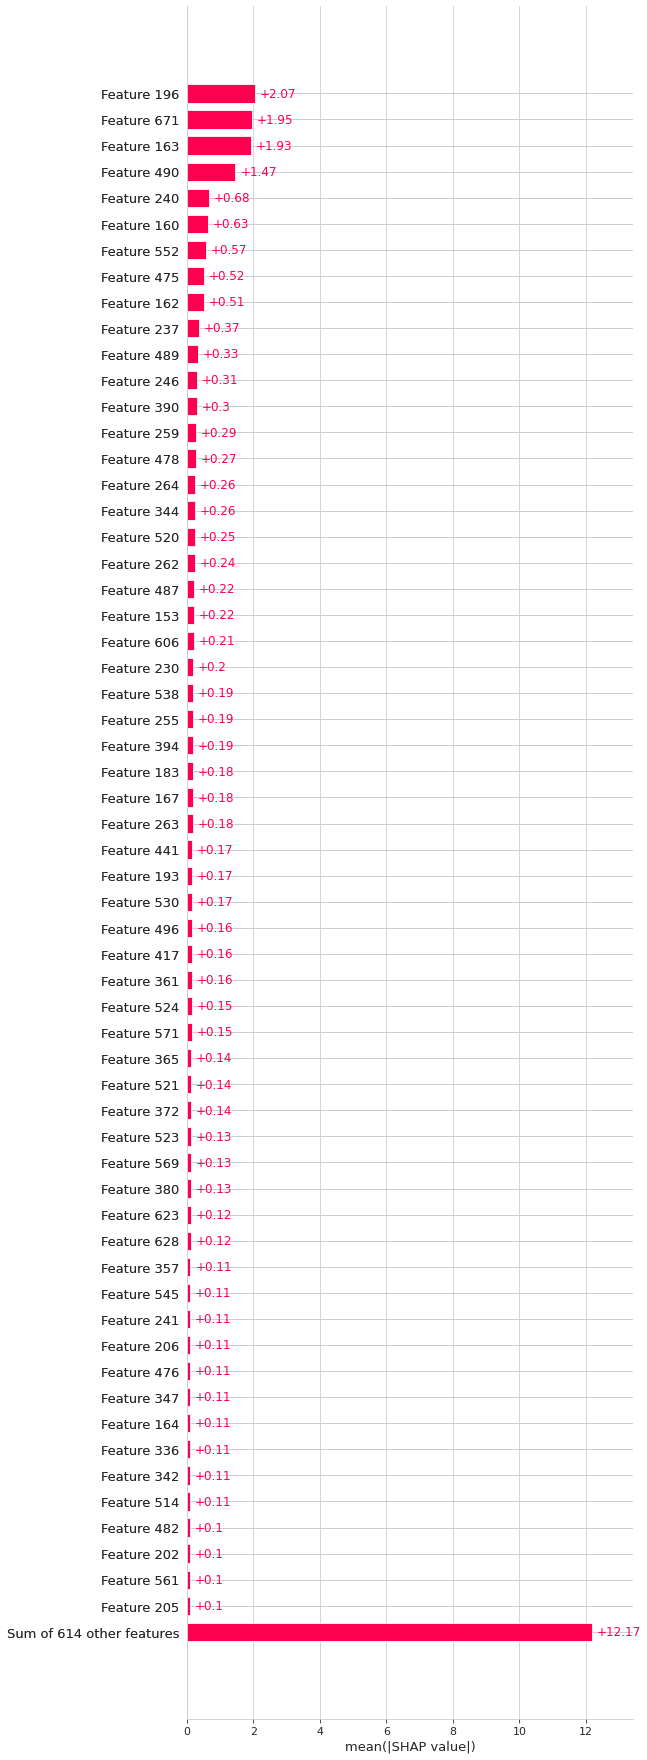

In [60]:
shap.plots.bar(shap_values, max_display=60)

In [61]:
vals = np.abs(shap_values.values).mean(0)
feature_names = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).columns

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                 columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                              ascending=False, inplace=True)
feature_importance.iloc[:50,:]

,col_name,feature_importance_vals
196,coef_2_40_superiorfrontal-lh,2.066951
671,Age,1.954872
163,coef_2_40_superiorfrontal-rh,1.925480
490,beta_2_40_parstriangularis-rh,1.466280
240,offset_2_40_frontalpole-lh,0.679741
160,coef_2_40_precuneus-rh,0.626782
552,theta_2_40_middletemporal-rh,0.571555
475,beta_2_40_frontalpole-rh,0.516100
162,coef_2_40_rostralmiddlefrontal-rh,0.512053
237,offset_2_40_caudalmiddlefrontal-lh,0.368749


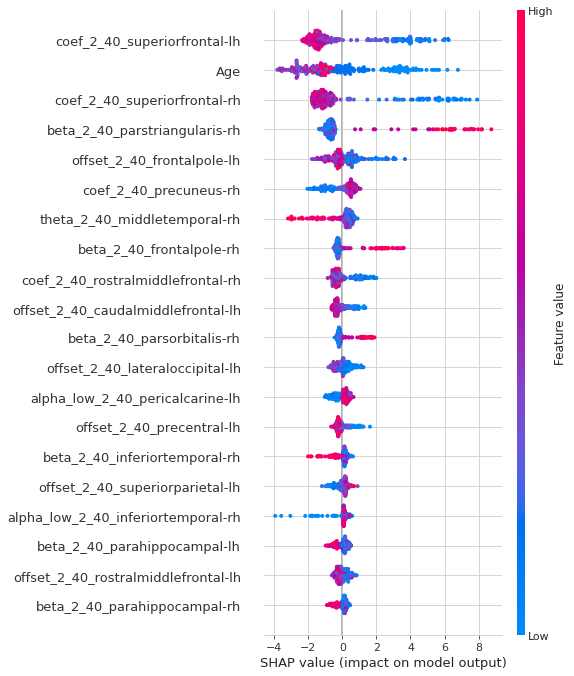

In [62]:
shap.summary_plot(shap_values, 
                  features=test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).values, 
                  feature_names=test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).columns)

In [63]:
test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).values.shape

(249, 673)

In [64]:
shap_values.shape

(249, 673)

In [65]:
train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]

,coef_35_45_bankssts-lh,coef_35_45_isthmuscingulate-lh,coef_35_45_superiortemporal-lh,coef_35_45_medialorbitofrontal-lh,coef_35_45_rostralanteriorcingulate-lh,coef_35_45_rostralmiddlefrontal-lh,coef_35_45_lateralorbitofrontal-rh
1637,-4.752550,-2.313747,-3.798401,-1.577731,-1.630876,-1.923085,-0.313248
1638,-3.597231,-3.026043,-3.546342,-0.514022,-0.985385,-0.886085,-1.535596
1639,-2.360075,-2.424007,-2.401065,0.353114,0.399776,-0.195609,-2.371661
1640,-2.865607,-2.246563,-1.497195,-2.031858,-2.109718,-1.281743,-4.896044
1641,-0.760016,-1.330983,-0.585700,-1.358038,-1.960639,-1.817010,-4.093954
...,...,...,...,...,...,...,...
2959,-2.693140,-2.526269,-2.247560,-0.920781,-1.171854,-1.912112,-3.705640
2960,-1.755465,-1.165598,-2.867880,-1.651534,-1.039386,-1.123702,-3.141094
2961,-1.491391,-1.205244,-1.233708,0.050018,0.107911,-0.477822,-0.525769
2962,-0.361567,-2.460768,-0.135479,1.779933,0.831753,-0.290238,-0.756857


In [ ]:
n_feats = np.arange(1,30,1)
#scores_train = []
scores_test = []

for i in n_feats:
  goods = np.array(feature_importance.index[:i].tolist())

  X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_train_a = train_all[train_all.Group==1]['IQ']
  X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_test_a = test_all[test_all.Group==1]['IQ']

  ss = StandardScaler()
  X_train_a = ss.fit_transform(X_train_a)
  X_test_a = ss.fit_transform(X_test_a)

  #rf_clf = RandomForestRegressor(n_estimators=100,
  #                              max_depth=15,
  #                              #min_samples_leaf=0.5,
  #                              random_state=42, 
  #                              n_jobs=-1) # run in parallel
  #rf_clf.fit(X_train_a, Y_train_a)
  #scores_train.append(rf_clf.score(X_train_a, Y_train_a))

  rf_clf = RandomForestRegressor(n_estimators=100,
                                max_depth=15,
                                #min_samples_leaf=0.5,
                                random_state=42, 
                                n_jobs=-1) # run in parallel
  rf_clf.fit(X_train_a, Y_train_a)
  scores_test.append(rf_clf.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

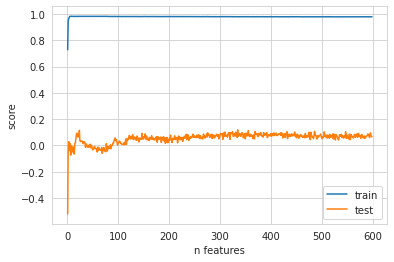

In [ ]:
plt.plot(n_feats, scores_train, label='train')
plt.plot(n_feats, scores_test, label='test')
plt.legend()
plt.xlabel('n features')
plt.ylabel('score')

Text(0, 0.5, 'score')

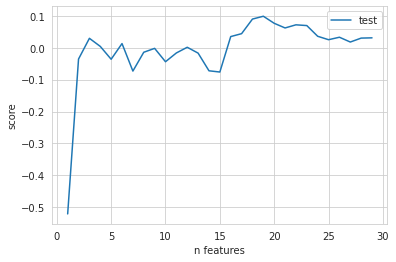

In [ ]:
plt.plot(n_feats, scores_test, label='test')
plt.legend()
plt.xlabel('n features')
plt.ylabel('score')

In [67]:
goods = np.array(feature_importance.index[:20].tolist())

In [70]:
np.array(feature_importance.index[:20].tolist())

array([196, 671, 163, 490, 240, 160, 552, 475, 162, 237, 489, 246, 390,
       259, 478, 264, 344, 520, 262, 487])

In [118]:
goods = np.array([196, 671, 490, 240, 160, 475, 162, 237, 478, 264, 344, 520, 262]) #best
train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods].columns

Index(['coef_2_40_superiorfrontal-lh', 'Age', 'beta_2_40_parstriangularis-rh',
       'offset_2_40_frontalpole-lh', 'coef_2_40_precuneus-rh',
       'beta_2_40_frontalpole-rh', 'coef_2_40_rostralmiddlefrontal-rh',
       'offset_2_40_caudalmiddlefrontal-lh', 'beta_2_40_inferiortemporal-rh',
       'offset_2_40_superiorparietal-lh', 'alpha_low_2_40_inferiortemporal-rh',
       'beta_2_40_parahippocampal-lh', 'offset_2_40_rostralmiddlefrontal-lh'],
      dtype='object')

In [69]:
X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
Y_train_a = train_all[train_all.Group==1]['IQ']
X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
Y_test_a = test_all[test_all.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)

rf_clf = RandomForestRegressor(n_estimators=100,
                              max_depth=15,
                              #min_samples_leaf=0.5,
                              random_state=42, 
                              n_jobs=-1) # run in parallel
rf_clf.fit(X_train_a, Y_train_a)
rf_clf.score(X_train_a, Y_train_a)

0.9821494981934557

In [ ]:

rf_clf = RandomForestRegressor(n_estimators=100,
                                max_depth=15,
                                #min_samples_leaf=0.5,
                                random_state=42, 
                                n_jobs=-1) # run in parallel
rf_clf.fit(X_train_a, Y_train_a)
rf_clf.score(X_test_a, Y_test_a)

0.07631092437912157

In [117]:
goods = np.array([196, 671, 490, 240, 160, 475, 162, 237, 478, 264, 344, 520, 262])

X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
Y_train_a = train_all[train_all.Group==1]['IQ']
X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
Y_test_a = test_all[test_all.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)

rf_clf = RandomForestRegressor(n_estimators=100,
                                max_depth=15,
                                #min_samples_leaf=0.5,
                                random_state=42, 
                                n_jobs=-1) # run in parallel
rf_clf.fit(X_train_a, Y_train_a)
rf_clf.score(X_test_a, Y_test_a)

0.23205879060290857

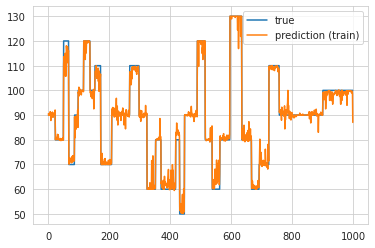

In [119]:
plt.plot(np.arange(len(Y_train_a)), Y_train_a, label='true')
plt.plot(np.arange(len(Y_train_a)), rf_clf.predict(X_train_a), label='prediction (train)')
plt.legend()

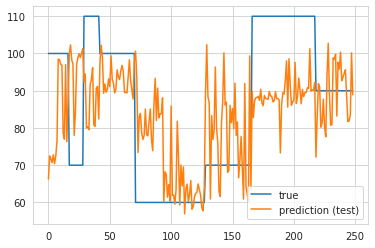

In [120]:
plt.plot(np.arange(len(Y_test_a)), Y_test_a, label='true')
plt.plot(np.arange(len(Y_test_a)), rf_clf.predict(X_test_a), label='prediction (test)')
plt.legend()

##Control

In [122]:
X_train_c = train_all[train_all.Group==0].drop(columns=['IQ', 'Subject', 'Unnamed: 0'])
Y_train_c = train_all[train_all.Group==0]['IQ']
X_test_c = test_all[test_all.Group==0].drop(columns=['IQ', 'Subject', 'Unnamed: 0'])
Y_test_c = test_all[test_all.Group==0]['IQ']

ss = StandardScaler()
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

rf_clf = RandomForestRegressor(n_estimators=100,
                               max_depth=15,
                               #min_samples_leaf=0.5,
                               random_state=42, 
                               n_jobs=-1) # run in parallel

rf_clf.fit(X_train_c, Y_train_c)

# Compute accuracy based on test samples
print("The model training score is" , rf_clf.score(X_test_c, Y_test_c))

The model training score is 0.06922232615932256


In [123]:
# Fits the explainer
explainer = shap.Explainer(rf_clf.predict, X_test_c)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_c, max_evals=1345)

Permutation explainer: 296it [16:44,  3.43s/it]


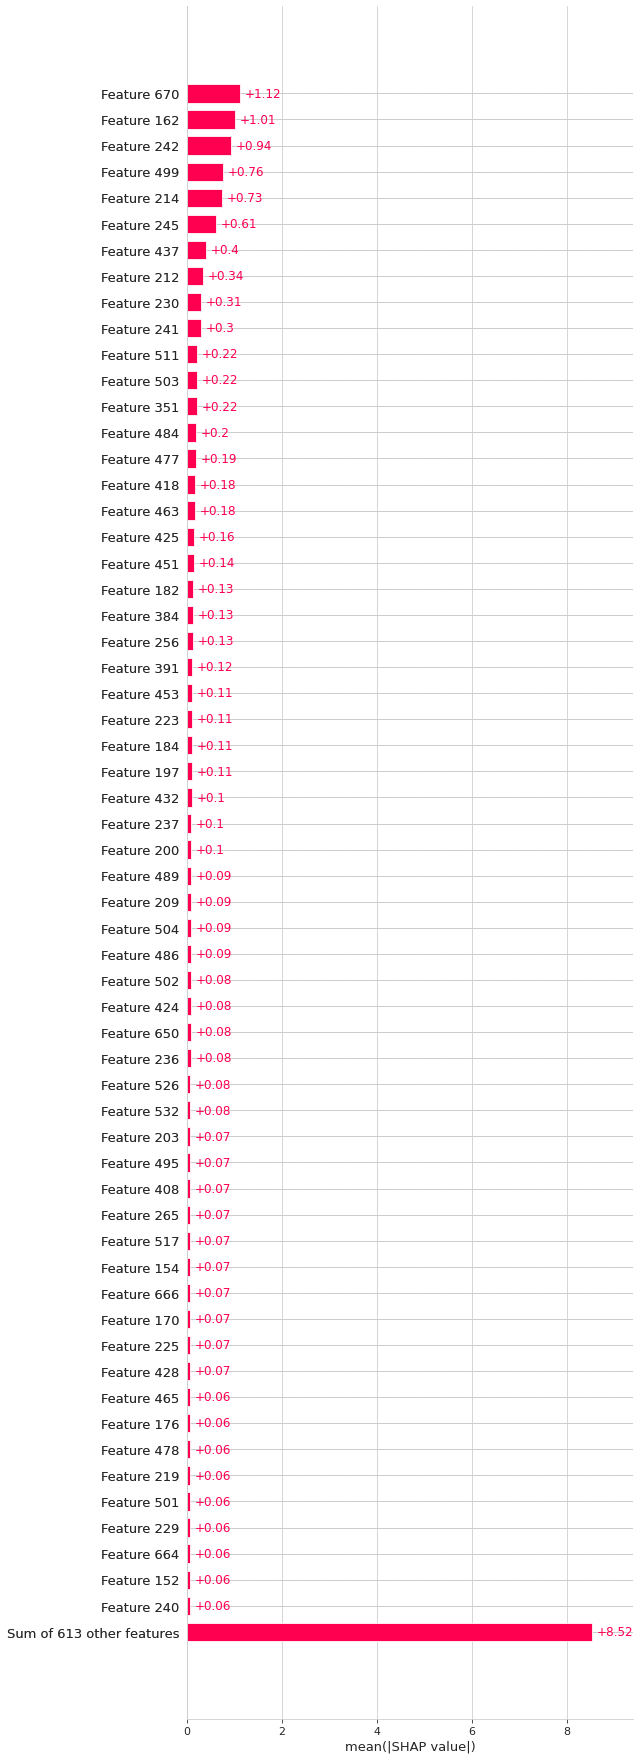

In [124]:
shap.plots.bar(shap_values, max_display=60)

In [125]:
vals = np.abs(shap_values.values).mean(0)
feature_names = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).columns

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                 columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                              ascending=False, inplace=True)
feature_importance.iloc[:50,:]

,col_name,feature_importance_vals
670,delta_2_40_transversetemporal-lh,1.117675
162,coef_2_40_rostralmiddlefrontal-rh,1.014163
242,offset_2_40_inferiorparietal-lh,0.937608
499,beta_2_40_superiorparietal-rh,0.755232
214,offset_2_40_lateralorbitofrontal-rh,0.732328
245,offset_2_40_isthmuscingulate-lh,0.606858
437,alpha_high_2_40_caudalanteriorcingulate-lh,0.403719
212,offset_2_40_isthmuscingulate-rh,0.337694
230,offset_2_40_superiorfrontal-rh,0.305898
241,offset_2_40_fusiform-lh,0.301811


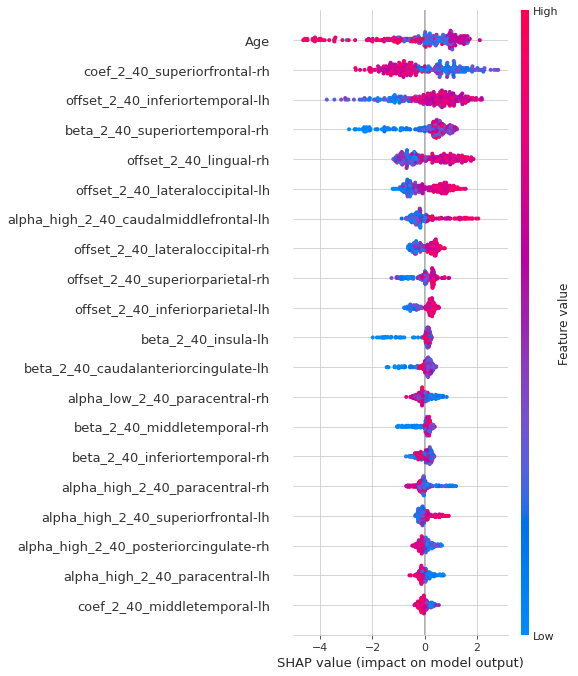

In [126]:
shap.summary_plot(shap_values, 
                  features=test_all[test_all.Group==0].drop(columns=['IQ', 'Subject', 'Unnamed: 0']).values, 
                  feature_names=test_all[test_all.Group==0].drop(columns=['IQ', 'Subject', 'Unnamed: 0']).columns)

In [127]:
test_all[test_all.Group==1].drop(columns=['IQ', 'Subject', 'Unnamed: 0']).values.shape

(249, 672)

In [128]:
shap_values.shape

(295, 672)

In [129]:
train_all[train_all.Group==1].drop(columns=['IQ', 'Subject', 'Unnamed: 0']).iloc[:,goods]

,coef_2_40_superiorparietal-lh,Group,beta_2_40_pericalcarine-rh,offset_2_40_fusiform-lh,coef_2_40_rostralanteriorcingulate-rh,beta_2_40_fusiform-rh,coef_2_40_superiorfrontal-rh,offset_2_40_cuneus-lh,beta_2_40_insula-rh,offset_2_40_superiortemporal-lh,alpha_low_2_40_insula-rh,beta_2_40_parsopercularis-lh,offset_2_40_superiorfrontal-lh
1637,1.038046,1,1.333337,-0.266071,1.210248,1.267349,1.015638,-0.396562,1.404002,-0.076927,1.240000,1.354868,-0.427049
1638,1.096876,1,1.333605,-0.048772,1.099376,1.247803,0.906930,-0.135265,1.314629,-0.153455,1.338631,1.250183,-0.515364
1639,1.152951,1,1.422867,-0.064141,0.910994,1.229316,0.816734,0.129573,1.258125,-0.143880,1.313542,1.203476,-0.717822
1640,1.204281,1,1.439331,-0.081870,1.027962,1.203859,0.914435,0.149508,1.261924,-0.088565,1.346020,1.266845,-0.647961
1641,1.122290,1,1.355411,-0.122371,1.082220,1.220210,0.868804,-0.100413,1.281345,-0.096179,1.281809,1.221307,-0.606242
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,1.218632,1,1.371857,-0.278144,1.075370,1.126387,1.016607,-0.353603,1.111193,-0.119028,1.324698,1.171594,-0.436284
2960,1.216105,1,1.343796,-0.221475,1.146590,1.092777,1.046840,-0.328303,1.123309,-0.078412,1.231886,1.066562,-0.447267
2961,1.344831,1,1.412713,-0.163949,1.110916,1.084703,0.937353,-0.133005,1.120506,-0.052894,1.213360,1.052472,-0.497522
2962,1.345523,1,1.481222,-0.113619,1.285113,1.113113,1.005466,-0.022392,1.039453,-0.059227,1.114998,1.071841,-0.484276


In [132]:
n_feats = np.arange(1,100,1)
#scores_train = []
scores_test = []

for i in n_feats:
  goods = np.array(feature_importance.index[:i].tolist())

  X_train_c = train_all[train_all.Group==0].drop(columns=['IQ', 'Subject', 'Unnamed: 0']).iloc[:,goods]
  Y_train_c = train_all[train_all.Group==0]['IQ']
  X_test_c = test_all[test_all.Group==0].drop(columns=['IQ', 'Subject', 'Unnamed: 0']).iloc[:,goods]
  Y_test_c = test_all[test_all.Group==0]['IQ']

  ss = StandardScaler()
  X_train_c = ss.fit_transform(X_train_c)
  X_test_c = ss.fit_transform(X_test_c)

  #rf_clf = RandomForestRegressor(n_estimators=100,
  #                              max_depth=15,
  #                              #min_samples_leaf=0.5,
  #                              random_state=42, 
  #                              n_jobs=-1) # run in parallel
  #rf_clf.fit(X_train_a, Y_train_a)
  #scores_train.append(rf_clf.score(X_train_a, Y_train_a))

  rf_clf = RandomForestRegressor(n_estimators=100,
                                max_depth=15,
                                #min_samples_leaf=0.5,
                                random_state=42, 
                                n_jobs=-1) # run in parallel
  rf_clf.fit(X_train_c, Y_train_c)
  scores_test.append(rf_clf.score(X_test_c, Y_test_c))

Text(0, 0.5, 'score')

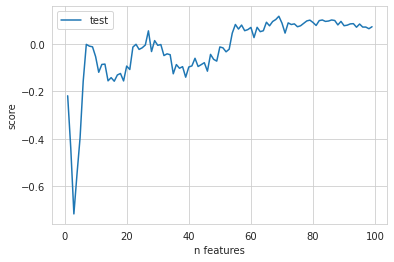

In [133]:
plt.plot(n_feats, scores_test, label='test')
plt.legend()
plt.xlabel('n features')
plt.ylabel('score')

In [144]:
np.argmax(scores_test[:40])

26

In [145]:
np.array(feature_importance.index[:27].tolist())

array([670, 162, 242, 499, 214, 245, 437, 212, 230, 241, 511, 503, 351,
       484, 477, 418, 463, 425, 451, 182, 384, 256, 391, 453, 223, 184,
       197])

In [206]:
goods = np.array([670, 162, 242, 214, 245, 437, 212, 230, 241, 503, 351, 484, 477, 418, 463, 425, 451, 182, 384, 256, 391, 453, 223, 184, 197]) #best
train_all[train_all.Group==0].drop(columns=['IQ', 'Subject', 'Unnamed: 0']).iloc[:,goods].columns

Index(['Age', 'coef_2_40_superiorfrontal-rh',
       'offset_2_40_inferiortemporal-lh', 'offset_2_40_lingual-rh',
       'offset_2_40_lateraloccipital-lh',
       'alpha_high_2_40_caudalmiddlefrontal-lh',
       'offset_2_40_lateraloccipital-rh', 'offset_2_40_superiorparietal-rh',
       'offset_2_40_inferiorparietal-lh',
       'beta_2_40_caudalanteriorcingulate-lh', 'alpha_low_2_40_paracentral-rh',
       'beta_2_40_middletemporal-rh', 'beta_2_40_inferiortemporal-rh',
       'alpha_high_2_40_paracentral-rh', 'alpha_high_2_40_superiorfrontal-lh',
       'alpha_high_2_40_posteriorcingulate-rh',
       'alpha_high_2_40_paracentral-lh', 'coef_2_40_middletemporal-lh',
       'alpha_low_2_40_paracentral-lh', 'offset_2_40_postcentral-lh',
       'alpha_low_2_40_posteriorcingulate-lh',
       'alpha_high_2_40_parsopercularis-lh', 'offset_2_40_postcentral-rh',
       'coef_2_40_parahippocampal-lh', 'coef_2_40_superiortemporal-lh'],
      dtype='object')

In [205]:
goods = np.array([670, 162, 242, 214, 245, 437, 212, 230, 241, 503, 351, 484, 477, 418, 463, 425, 451, 182, 384, 256, 391, 453, 223, 184, 197])

X_train_c = train_all[train_all.Group==0].drop(columns=['IQ', 'Subject', 'Unnamed: 0']).iloc[:,goods]
Y_train_c = train_all[train_all.Group==0]['IQ']
X_test_c = test_all[test_all.Group==0].drop(columns=['IQ', 'Subject', 'Unnamed: 0']).iloc[:,goods]
Y_test_c = test_all[test_all.Group==0]['IQ']

ss = StandardScaler()
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

  #rf_clf = RandomForestRegressor(n_estimators=100,
  #                              max_depth=15,
  #                              #min_samples_leaf=0.5,
  #                              random_state=42, 
  #                              n_jobs=-1) # run in parallel
  #rf_clf.fit(X_train_a, Y_train_a)
  #scores_train.append(rf_clf.score(X_train_a, Y_train_a))

rf_clf = RandomForestRegressor(n_estimators=100,
                                max_depth=15,
                                #min_samples_leaf=0.5,
                                random_state=42, 
                                n_jobs=-1) # run in parallel
rf_clf.fit(X_train_c, Y_train_c)
rf_clf.score(X_test_c, Y_test_c)

0.0965054701021022

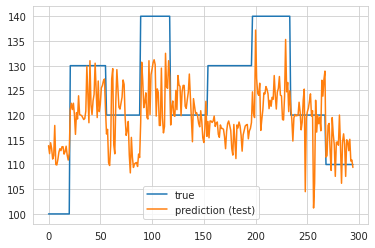

In [207]:
plt.plot(np.arange(len(Y_test_c)), Y_test_c, label='true')
plt.plot(np.arange(len(Y_test_c)), rf_clf.predict(X_test_c), label='prediction (test)')
plt.legend()

In [ ]:
n_ests = np.arange(1,100,1)
score = []

for i in n_ests:
  goods = np.array(feature_importance.index[:20].tolist())

  X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_train_a = train_all[train_all.Group==1]['IQ']
  X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_test_a = test_all[test_all.Group==1]['IQ']

  ss = StandardScaler()
  X_train_a = ss.fit_transform(X_train_a)
  X_test_a = ss.fit_transform(X_test_a)

  rf_clf = RandomForestRegressor(n_estimators=i,
                                  max_depth=15,
                                  #min_samples_leaf=0.5,
                                  random_state=42, 
                                  n_jobs=-1) # run in parallel
  rf_clf.fit(X_train_a, Y_train_a)
  score.append(rf_clf.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

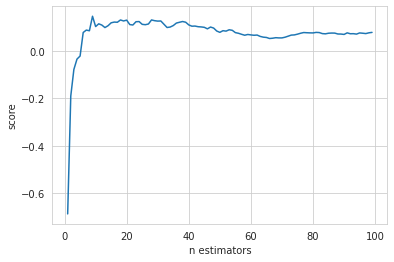

In [ ]:
plt.plot(n_ests, score)
plt.xlabel('n estimators')
plt.ylabel('score')

In [ ]:
depths = np.arange(1,100,1)
score = []

for i in depths:
  goods = np.array(feature_importance.index[:20].tolist())

  X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_train_a = train_all[train_all.Group==1]['IQ']
  X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_test_a = test_all[test_all.Group==1]['IQ']

  ss = StandardScaler()
  X_train_a = ss.fit_transform(X_train_a)
  X_test_a = ss.fit_transform(X_test_a)

  rf_clf = RandomForestRegressor(n_estimators=19,
                                  max_depth=i,
                                  #min_samples_leaf=0.5,
                                  random_state=42, 
                                  n_jobs=-1) # run in parallel
  rf_clf.fit(X_train_a, Y_train_a)
  score.append(rf_clf.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

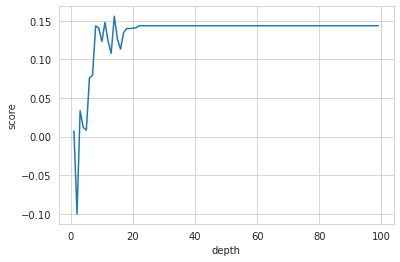

In [ ]:
plt.plot(depths, score)
plt.xlabel('depth')
plt.ylabel('score')

In [ ]:
leafs = np.arange(1,100,1)
score = []

for i in leafs:
  goods = np.array(feature_importance.index[:20].tolist())

  X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_train_a = train_all[train_all.Group==1]['IQ']
  X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_test_a = test_all[test_all.Group==1]['IQ']

  ss = StandardScaler()
  X_train_a = ss.fit_transform(X_train_a)
  X_test_a = ss.fit_transform(X_test_a)

  rf_clf = RandomForestRegressor(n_estimators=19,
                                  max_depth=25,
                                  min_samples_leaf=i,
                                  #min_samples_split=i,
                                  #max_features = 
                                  random_state=42, 
                                  n_jobs=-1) # run in parallel
  rf_clf.fit(X_train_a, Y_train_a)
  score.append(rf_clf.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

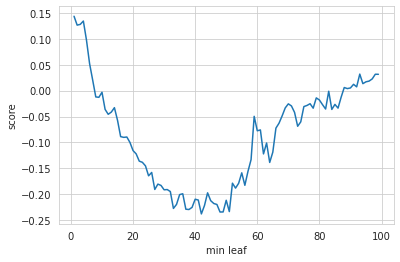

In [ ]:
plt.plot(leafs, score)
plt.xlabel('min leaf')
plt.ylabel('score')

In [ ]:
splits = np.arange(2,100,1)
score = []

for i in splits:
  goods = np.array(feature_importance.index[:20].tolist())

  X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_train_a = train_all[train_all.Group==1]['IQ']
  X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_test_a = test_all[test_all.Group==1]['IQ']

  ss = StandardScaler()
  X_train_a = ss.fit_transform(X_train_a)
  X_test_a = ss.fit_transform(X_test_a)

  rf_clf = RandomForestRegressor(n_estimators=19,
                                  max_depth=25,
                                  min_samples_leaf=1,
                                  min_samples_split=i,
                                  #max_features = 
                                  random_state=42, 
                                  n_jobs=-1) # run in parallel
  rf_clf.fit(X_train_a, Y_train_a)
  score.append(rf_clf.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

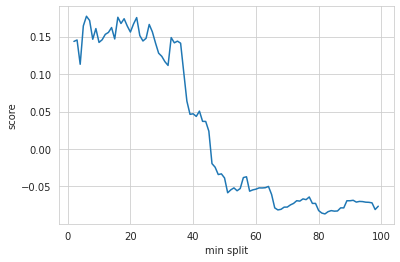

In [ ]:
plt.plot(splits, score)
plt.xlabel('min split')
plt.ylabel('score')

In [ ]:
np.argmax(score)

4

In [ ]:
feats = np.arange(1,20,1)
score = []

for i in feats:
  goods = np.array(feature_importance.index[:20].tolist())

  X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_train_a = train_all[train_all.Group==1]['IQ']
  X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_test_a = test_all[test_all.Group==1]['IQ']

  ss = StandardScaler()
  X_train_a = ss.fit_transform(X_train_a)
  X_test_a = ss.fit_transform(X_test_a)

  rf_clf = RandomForestRegressor(n_estimators=19,
                                  max_depth=25,
                                  min_samples_leaf=1,
                                  min_samples_split=6,
                                  max_features = i,
                                  random_state=42, 
                                  n_jobs=-1) # run in parallel
  rf_clf.fit(X_train_a, Y_train_a)
  score.append(rf_clf.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

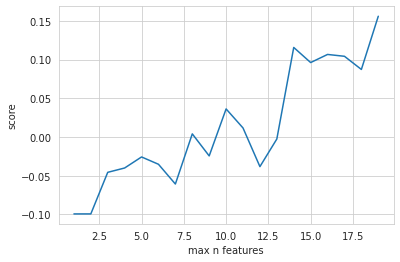

In [ ]:
plt.plot(feats, score)
plt.xlabel('max n features')
plt.ylabel('score')

In [ ]:
goods = np.array(feature_importance.index[:20].tolist())

X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
Y_train_a = train_all[train_all.Group==1]['IQ']
X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
Y_test_a = test_all[test_all.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)

rf_clf = RandomForestRegressor(n_estimators=19,
                                  max_depth=25,
                                  min_samples_leaf=1,
                                  min_samples_split=6,
                                  max_features = 20,
                                  random_state=42, 
                                  n_jobs=-1) # run in parallel
rf_clf.fit(X_train_a, Y_train_a)
rf_clf.score(X_test_a, Y_test_a)

0.1771841975806865

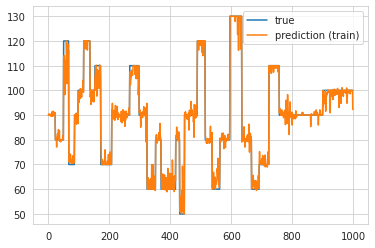

In [ ]:
plt.plot(np.arange(len(Y_train_a)), Y_train_a, label='true')
plt.plot(np.arange(len(Y_train_a)), rf_clf.predict(X_train_a), label='prediction (train)')
plt.legend()

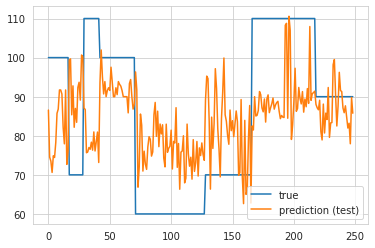

In [ ]:
plt.plot(np.arange(len(Y_test_a)), Y_test_a, label='true')
plt.plot(np.arange(len(Y_test_a)), rf_clf.predict(X_test_a), label='prediction (test)')
plt.legend()

In [ ]:
df_my['Unnamed: 0'][:50]

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26     0
27     1
28     2
29     3
30     4
31     5
32     6
33     7
34     8
35     9
36    10
37    11
38    12
39    13
40    14
41    15
42    16
43    17
44    18
45     0
46     1
47     2
48     3
49     4
Name: Unnamed: 0, dtype: int64